In [1]:
import os

In [2]:
os.chdir("/Users/ariedamuco/Dropbox (CEU Econ)/TextAnalysisCEU")

Let's apply what we have seen in theory. First of all, we are going to start creating our corpus of four documents which are actually motivational quotes from a google chrome extension which we are going to find in the inputs folder. They are named Motivational1, Motivatioanl2, Motivational3, Motivational4.

In [3]:
os.listdir()

['.DS_Store',
 'Recordings',
 'Icon\r',
 'Output',
 'Code',
 'Slides',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git',
 'Inputs']

In [4]:
os.listdir("Inputs")

['106-extracted-date',
 'AmazonShort.csv',
 'budapest.txt',
 'Motivational4.txt',
 '105-extracted-date',
 'nltk_stopwords.txt',
 'Motivational1.txt',
 'Motivational2.txt',
 'articles_bbc_2018_01_30.csv',
 'greatest_hits2000.csv',
 'Motivational3.txt',
 'smsspamcollection',
 'pdfs',
 'greatest_hits1980.csv',
 'droplist.txt',
 'Hello.txt',
 'Social_Network_Ads.csv',
 'greatest_hits1990.csv']

In [5]:
for element in os.listdir("Inputs"):
    if ".txt" in element:
        print(element)

budapest.txt
Motivational4.txt
nltk_stopwords.txt
Motivational1.txt
Motivational2.txt
Motivational3.txt
droplist.txt
Hello.txt


In [6]:
doc1 = open('Inputs/Motivational1.txt').read()
doc2 = open('Inputs/Motivational2.txt').read()
doc3 = open('Inputs/Motivational3.txt').read()
doc4 = open('Inputs/Motivational4.txt').read()

### Challenge: Write better code to open the documents above. 

In [7]:
doc1

'Develop success from failures. Discouragement and failure are two of the surest stepping stones to success'

In [8]:
doc2

'It is better to fail in originality than to succeed in imitation.\n\n'

In [9]:
list_docs = [doc1, doc2, doc3, doc4]

In [10]:
list_docs

['Develop success from failures. Discouragement and failure are two of the surest stepping stones to success',
 'It is better to fail in originality than to succeed in imitation.\n\n',
 'Learn from yesterday, live for today, hope for tomorrow. The important thing is not to stop questioning.',
 'Start where you are. Use what you have. Do what you can.\n\n']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vectorizer = CountVectorizer()

In [13]:
doc_vec = vectorizer.fit_transform(list_docs)

In [14]:
doc_vec

<4x44 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [15]:
import pandas as pd
df= pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names())

In [16]:
df

,0,1,2,3
and,1,0,0,0
are,1,0,0,1
better,0,1,0,0
can,0,0,0,1
develop,1,0,0,0
discouragement,1,0,0,0
do,0,0,0,1
fail,0,1,0,0
failure,1,0,0,0
failures,1,0,0,0


In [17]:
df.columns = ["doc1", "doc2", "doc3", "doc4"]

In [18]:
df

,doc1,doc2,doc3,doc4
and,1,0,0,0
are,1,0,0,1
better,0,1,0,0
can,0,0,0,1
develop,1,0,0,0
discouragement,1,0,0,0
do,0,0,0,1
fail,0,1,0,0
failure,1,0,0,0
failures,1,0,0,0


In [19]:
#http://www.nltk.org/book/ch01.html
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize

In [20]:
stop_words = stopwords.words('english')

In [21]:
def preprocessing_text(text):
    words = word_tokenize(text.lower())
    tokens = [word for word in words if word not in string.punctuation]
    tokens = [token for token in tokens if token not in  stop_words]
    stemmer = LancasterStemmer()
    tokens_lematized = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens_lematized)
    return preprocessed_text 

Let's read the file with motivational content. These are short sentences. The purpose is so  that we can see the Tfidf more clearly.

In [22]:
word_list = []
for line in list_docs:
    word_list.append(preprocessing_text(line))
word_list

['develop success fail disco fail two surest step ston success',
 'bet fail origin success imit',
 'learn yesterday liv today hop tomorrow import thing stop quest',
 'start us']

In [23]:
len(set(" ".join(word_list).split()))

23

In [24]:
#vectorizer = TfidfVectorizer(preprocessor=preprocessing_text)

vectorizer = TfidfVectorizer()
# ngram_range=(1,3),stop_words='english'
#ngram_range=(1,3)

In [25]:
vectorizer

TfidfVectorizer()

In [26]:
doc_vector = vectorizer.fit_transform(word_list)

In [27]:
doc_vector.shape

(4, 23)

In [28]:
doc_vector

<4x23 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [29]:
doc_vector.toarray()

array([[0.        , 0.30188562, 0.30188562, 0.47602018, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30188562, 0.30188562, 0.        ,
        0.47602018, 0.30188562, 0.        , 0.        , 0.        ,
        0.30188562, 0.        , 0.        ],
       [0.48546061, 0.        , 0.        , 0.38274272, 0.        ,
        0.48546061, 0.        , 0.        , 0.        , 0.48546061,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.38274272, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.31622777,
        0.        , 0.31622777, 0.31622777, 0.31622777, 0.        ,
        0.31622777, 0.        , 0.        , 0.        , 0.31622777,
        0.        , 0.        , 0.31622777, 0.31622777, 0.31622777,
        0.        , 0.        , 0.31622777],
       [0.        , 0.        , 0.        , 0.   

In [30]:
doc_vector.toarray().transpose()

array([[0.        , 0.48546061, 0.        , 0.        ],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.47602018, 0.38274272, 0.        , 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.48546061, 0.        , 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.48546061, 0.        , 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.        , 0.        , 0.        , 0.70710678],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.31622777, 0.        ],
       [0.47602018, 0.38274272, 0.        , 0.        ],
       [0.30188562, 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [31]:
df = pd.DataFrame(doc_vector.toarray().transpose(), index=vectorizer.get_feature_names())

In [32]:
df

,0,1,2,3
bet,0.000000,0.485461,0.000000,0.000000
develop,0.301886,0.000000,0.000000,0.000000
disco,0.301886,0.000000,0.000000,0.000000
fail,0.476020,0.382743,0.000000,0.000000
hop,0.000000,0.000000,0.316228,0.000000
imit,0.000000,0.485461,0.000000,0.000000
import,0.000000,0.000000,0.316228,0.000000
learn,0.000000,0.000000,0.316228,0.000000
liv,0.000000,0.000000,0.316228,0.000000
origin,0.000000,0.485461,0.000000,0.000000


In [33]:
df.columns = ['doc1', 'doc2', 'doc3', 'doc4']

In [34]:
df

,doc1,doc2,doc3,doc4
bet,0.000000,0.485461,0.000000,0.000000
develop,0.301886,0.000000,0.000000,0.000000
disco,0.301886,0.000000,0.000000,0.000000
fail,0.476020,0.382743,0.000000,0.000000
hop,0.000000,0.000000,0.316228,0.000000
imit,0.000000,0.485461,0.000000,0.000000
import,0.000000,0.000000,0.316228,0.000000
learn,0.000000,0.000000,0.316228,0.000000
liv,0.000000,0.000000,0.316228,0.000000
origin,0.000000,0.485461,0.000000,0.000000


In [35]:
count_model = CountVectorizer(ngram_range=(1,1), stop_words='english')

In [36]:
docs_unigram = count_model.fit_transform(word_list)

In [37]:
docs_unigram

<4x21 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [38]:
docs_unigram.todense()

matrix([[0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [39]:
docs_unigram_matrix = (docs_unigram.T * docs_unigram)

In [40]:
docs_unigram_matrix.setdiag(0)

In [41]:
#docs_unigram_matrix.todense()

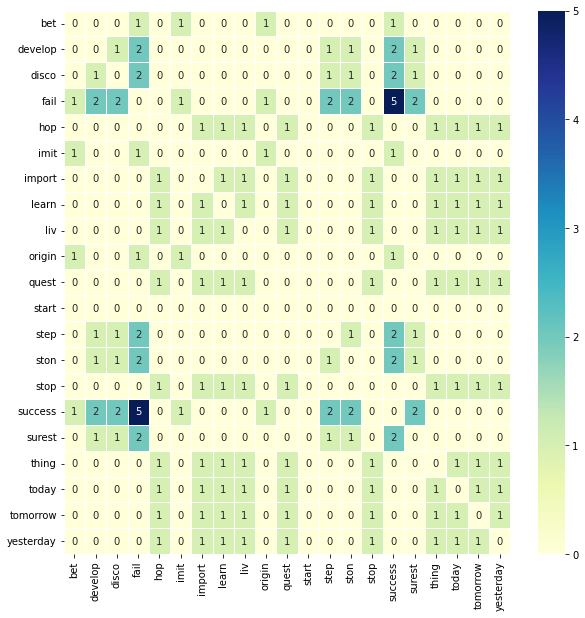

In [42]:
import seaborn as sns
df = pd.DataFrame(docs_unigram_matrix.todense(), index = count_model.get_feature_names())
df.columns = count_model.get_feature_names()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df, annot=True,linewidths=.5, cmap="YlGnBu" )

### References
https://en.wikipedia.org/wiki/Sparse_matrix

https://machinelearningmastery.com/sparse-matrices-for-machine-learning/

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

https://en.wikipedia.org/wiki/N-gram

https://scikit-learn.org/stable/